# Linear Dependence & Span
> My learning notes.

- toc: true 
- badges: true
- comments: true
- categories: [linear_algebra]
- image: images/chart-preview.png

In [1]:
# From: https://hadrienj.github.io/posts/
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

(0.0, 5.0)

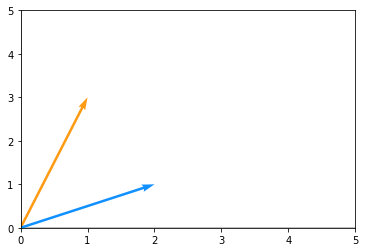

In [3]:
orange = '#FF9A13'
blue = '#1190FF'
u = [1, 3]
v = [2, 1]
plotVectors([u, v], [orange, blue])
plt.xlim(0, 5)
plt.ylim(0, 5)

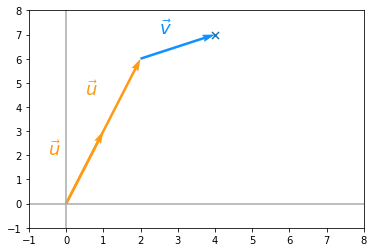

In [4]:
# Weigths of the vectors
a = 2
b = 1
# Start and end coordinates of the vectors
u = [0,0,1,3]
v = [2,6,2,1]

plt.quiver([u[0], a*u[0], b*v[0]],
           [u[1], a*u[1], b*v[1]],
           [u[2], a*u[2], b*v[2]],
           [u[3], a*u[3], b*v[3]],
           angles='xy', scale_units='xy', scale=1, color=[orange, orange, blue])
plt.xlim(-1, 8)
plt.ylim(-1, 8)
# Draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(4,7,marker='x',s=50)
# Draw the name of the vectors
plt.text(-0.5, 2, r'$\vec{u}$', color=orange, size=18)
plt.text(0.5, 4.5, r'$\vec{u}$', color=orange, size=18)
plt.text(2.5, 7, r'$\vec{v}$', color=blue, size=18)
plt.show()
plt.close()

### Adding 2 vectors: linear combination or weighted sum

In [5]:
a * np.array(u) + b * np.array(v)

array([2, 6, 4, 7])

### Linear dependence
From: https://math.stackexchange.com/a/2780506/1086132

Here's my intuition: Think of vectors as the axes that we use to define a two-dimensional, three-dimensional, or $n$-dimensional space. **A set of vectors is linearly dependent when one of the vectors isn't necessary — it doesn't add anything useful to our coordinate system.**  This happens when one vector is just a linear combination of other vectors in the set.

As an example, consider these three vectors in two-dimensional space:

$\vec w = \begin{bmatrix}2 \\3 \end{bmatrix}$,
$\vec x = \begin{bmatrix}1 \\0 \end{bmatrix}$,
$\vec y = \begin{bmatrix}0 \\1 \end{bmatrix}$

In this case, we can express $\vec w$ as a linear combination of the other two vectors, $\vec w = 2 \vec x + 3 \vec y$:

$\begin{bmatrix}2 \\3 \end{bmatrix} = 2\cdot \begin{bmatrix}1 \\0 \end{bmatrix} + 3\cdot \begin{bmatrix}0 \\1 \end{bmatrix}$

Equivalently, we can rewrite this as $2\vec x + 3 \vec y - 1\vec w = 0$:

$2\cdot \begin{bmatrix}1 \\0 \end{bmatrix} + 3\cdot \begin{bmatrix}0 \\1 \end{bmatrix} - 1 \begin{bmatrix}2 \\3 \end{bmatrix} = \begin{bmatrix}0 \\0 \end{bmatrix}$

Intuitively, this is what is meant by the proof.  When these factors hold, it means that at least one vector is essentially "redundant" and unnecessary — it's just a combination of the other vectors. 

More generally, assume you have a set of vectors with this property:

$a_1 \vec v_1 + a_2  \vec v_2 + ... + a_n \vec v_n = 0 $

This can be written as:

$-a_1 \vec v_1 = a_2  \vec v_2 + ... + a_n  \vec v_n$

Which means that $v_1$ can be expressed as simply a linear combination of the other vectors:

$v_1 = a_2' v_2 + ... + a_n'v_n$
 
When you have a set of vectors like this, it means that you have multiple ways to express the same point using your coordinate system.  For example, with the vectors above, a point could be identified in the standard *x/y* coordinate system as (8, 15).  But the same point could also be expressed as (4, 3) in *w/y* coordinates or as (5, -2) in *w/x* coordinates:

$8\vec x + 15 \vec y = 8\begin{bmatrix}1 \\0 \end{bmatrix} + 15 \begin{bmatrix}0 \\1 \end{bmatrix} = \begin{bmatrix}8 \\15 \end{bmatrix}$

$4\vec w + 3 \vec y = 4\begin{bmatrix}2 \\3 \end{bmatrix} + 3\begin{bmatrix}0 \\1 \end{bmatrix} = \begin{bmatrix}8 \\15 \end{bmatrix}$

$5\vec w -2 \vec x = 5\begin{bmatrix}2 \\3 \end{bmatrix} -2\begin{bmatrix}1 \\0 \end{bmatrix} = \begin{bmatrix}8 \\15 \end{bmatrix}$

We'd normally rather have a minimal set of vectors so that there's only one way to represent each point.  It keeps the math simpler.  This is similar to a system of equations in which you have three equations for two unknowns.  In the above, since we have $\vec w = 2 \vec x + 3 \vec y$, we can always substitute $\vec x$ and $\vec y$ for $\vec w$.  

Note that there's no "correct" coordinate system -- any set of two vectors here, $\{\vec x, \vec y\}$, $\{\vec w, \vec y\}$, or $\{\vec w, \vec x\}$, would provide a valid basis for a two-dimensional coordinate system.  But there's no need to have three vectors here to represent a point in two-dimensional space.



### Span
All the points we can reach by combininig u and v and changing a and b. This set of points is the `span` of the vectors `u` and `v`